# Fuzzy-Cmeans
## 其目标在于将样本分类到K个模式中

三个步骤:

1 Initialisation – 初始化隶属矩阵，第$i$个样本$x^{(i)}$的隶属矩阵如下（需要归一化，确保概率和为1，$M.shape=(m*k)$）
$$M_{origin}^{(i)}=[random()\ for\ j\ in\ range(k)]$$
$$M^{(i)}=M_{origin}^{(i)}/sum(M_{origin}^{(i)})$$
2 Assignment
$$c_j=\frac{\sum_i^m\omega_j^{(i)}x^{(i)}}{\sum_i^m\omega_j^{(i)}},j=1,2...k$$  
3 Update – The centroid of the clusters becomes the new mean
$$w_{ij}=\frac{1}{\sum_{t=1}^{k}(\frac{||x^{(i)}-c_j||}{||x^{(i)}-c_t||})^2}$$
4 min Loss
$$J=\sum_i^m\sum_j^kw_{ij}||x^{(i)}-c_j||^2$$

In [6]:
import random
import numpy as np

def get_proba_mat(X,k):
    #初始化隶属矩阵10*3
    proba_mat = []
    for i in range(X.shape[0]):
        random_list = [random.random() for i in range(k)]
        proba_lst = [x/sum(random_list) for x in random_list]
        proba_mat.append(proba_lst)
    return proba_mat

def get_center_lst(X,proba_mat,k,m):
    #计算聚类中心
    proba_mat_T = np.array(proba_mat).T
    center_lst = []
    for j in range(k):
        center_proba_lst = proba_mat_T[j]  #1*10
        proba_power_lst=[center_proba ** m for center_proba in center_proba_lst]
        denominator = sum(proba_power_lst) #分母
        
        product_lst = []
        for i in range(X.shape[0]):
            point = X.iloc[i]
            product = [proba_power_lst[i] * x for x in point]  #element like [proba*x,proba*y]
            product_lst.append(product)
        
        numerator = np.sum(product_lst,axis=0)  #分子
        center = [x/denominator for x in numerator]
        center_lst.append(center)
    lst_course.append(center_lst)
    return center_lst
        
def update_proba_mat(X,center_lst,proba_mat,k,m):
    #更新隶属矩阵
    p = 2/(m-1)
    for i in range(X.shape[0]):
        x = X.iloc[i]
        distances = [np.linalg.norm(x-center_lst[j]) for j in range(k)]
        for j in range(k):
            den = sum([(distances[j]/distances[c])**p for c in range(k)])
            proba_mat[i][j] = 1/den
    return proba_mat

#迭代
def fuzzyCMeansClustering(X,proba_mat,center_lst,k,m,max_iter):
    curr = 0
    while curr <= max_iter:
        center_lst = get_center_lst(X,proba_mat,k,m)
        proba_mat = update_proba_mat(X,center_lst,proba_mat,k,m)
        curr += 1
    return proba_mat,center_lst

In [7]:
import pandas as pd

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

X=df
k=3
m=2
max_iter=15
lst_course=[]

begin_mat=get_proba_mat(X,k)
begin_centers=get_center_lst(X,begin_mat,k,m)
end_mat,end_centers=fuzzyCMeansClustering(X,begin_mat,begin_centers,k,m,max_iter)

In [8]:
# begin_centers,end_centers

In [9]:
#打标签
def createLabels(X,end_centers):
    for j in range(k):
        X['distance_from_{}'.format(j)] = [np.linalg.norm(X.iloc[i,:2]-end_centers[j]) for i in range(X.shape[0])]

    X['label'] = [int(X.iloc[i,2:].idxmin()[-1]) for i in range(X.shape[0])]
    return X

#画图
def plot_changes(X,center_lst,end_centers):
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X.iloc[:,0], X.iloc[:,1])
    axes[0].scatter(np.array(center_lst).T[0], np.array(center_lst).T[1],marker="s",s=20)
    axes[1].scatter(X.iloc[:,0], X.iloc[:,1],c=X['label'])
    axes[1].scatter(np.array(end_centers).T[0], np.array(end_centers).T[1],marker="s",s=20)

    for i in range(k):
        x=center_lst[i][0]
        y=center_lst[i][1]
        dx = (end_centers[i][0] - center_lst[i][0])*0.75
        dy = (end_centers[i][1] - center_lst[i][1])*0.75
        axes[1].arrow(x, y, dx, dy, head_width=2, head_length=3)#, fc=colmap[i], ec=colmap[i]
        
    return plt

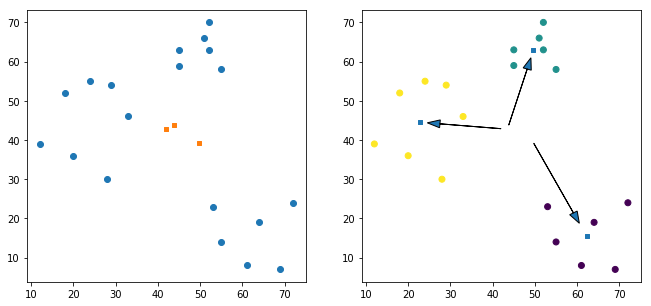

In [10]:
import matplotlib.pyplot as plt

X_end=createLabels(X.copy(),end_centers)
plt=plot_changes(X_end,begin_centers,end_centers)
plt.show()

### plot_course

In [16]:
import os
cwd=os.getcwd()
cwd

'C:\\Users\\Administrator\\2019-Data_science\\Case-exercise\\AIcomputing\\Fuzzy-Kmeans'

In [20]:
def plot_course(X,lst_course):
    plt.figure(figsize=(10,10))

    plt.scatter(X.iloc[:,0], X.iloc[:,1],c=X['label'])
    
    for i in range(len(lst_course)-1):
        plt.scatter(np.array(lst_course[i]).T[0], np.array(lst_course[i]).T[1],marker="s",s=20,color='r')
        for j in range(k):
            x1=lst_course[i][j][0]
            y1=lst_course[i][j][1]
            x2=lst_course[i+1][j][0]
            y2=lst_course[i+1][j][1]
            dx = (x2 - x1)
            dy = (y2 - y1)
            if i!=len(lst_course)-2:
                plt.arrow(x1, y1, dx, dy,color='red')
            else:
                plt.arrow(x1, y1, dx, dy,head_width=1,head_length=1.5,color='r')
        fname='{}/imgs/{}.png'.format(cwd,i)
        plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w')
    plt.show()

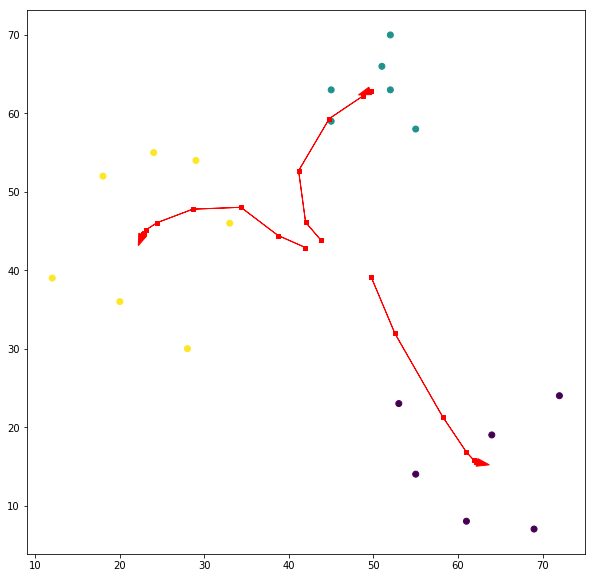

In [22]:
plot_course(X_end,lst_course)

In [23]:
from moviepy.editor import ImageSequenceClip

path='{}/imgs'.format(cwd)
img_names = ['{}/{}.png'.format(path,i) for i in range(0,16)]

clip = ImageSequenceClip(img_names,fps=3)
clip.write_gif('{}/demo.gif'.format(path))

t:  19%|█████████████▏                                                        | 3/16 [00:00<00:00, 20.85it/s, now=None]

MoviePy - Building file C:\Users\Administrator\2019-Data_science\Case-exercise\AIcomputing\Fuzzy-Kmeans/imgs/demo.gif with imageio.
